# "푸리에 급수"
> "sympy 및 numpy를 이용하여 푸리에 급수를 전개해 본다."

- toc: true
- badges: true
- author: 단호진
- categories: [general]

## sympy를 이용한 푸리에 급수 전개

## 참고

1. D.E.Newland, An introduction to spectral & wavelet analysis, 3rd., Longman scientific & Technical with John Wiley & Sons, Inc., New York, 1994
2. Sympy reference, https://docs.sympy.org/latest/modules/series/fourier.html
3. Numpy reference, https://numpy.org/doc/stable/reference/routines.fft.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from sympy.abc import x, t
from sympy.plotting import plot

0에서 $2\pi$를 한 주기로 하는 함수에 대하여 푸리에 전개를 수행해 보고, 다음절에서 동일 함수의 이산 표본에 대한 이산 푸리에 변환 분석을 수행해 보겠다.

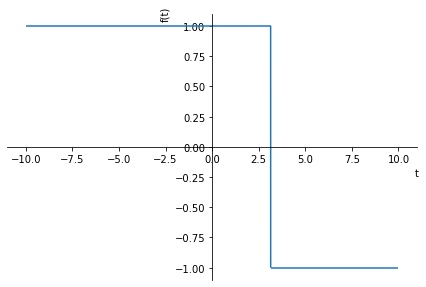

In [2]:
step_fn = Piecewise((1, t <= pi), (-1, t > -1))

plot(step_fn);

In [3]:
s = fourier_series(step_fn, (t, 0, 2 * pi))
s5 = s.truncate(5)
s5

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi) + 4*sin(7*t)/(7*pi) + 4*sin(9*t)/(9*pi)

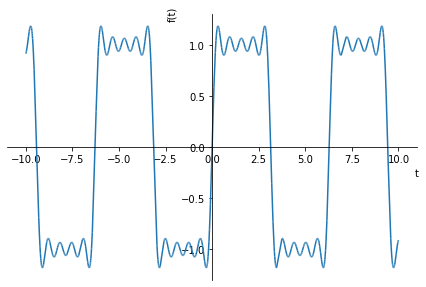

In [4]:
plot(s5);

계수를 직접 계산해보자[1].

(1) $x(t) = a_0 + 2 \sum_{k=1}^{\infty} \left( a_k \cos \frac{2 \pi k t}{T} +  b_k \sin \frac{2 \pi k t}{T} \right)$

단, $k \ge 0$에 대하여,

$a_k = \frac{1}{T} \int_{T} x(t) \cos \frac{2 \pi k t}{T} dt$

그리고, $k \gt 0$

$b_k = \frac{1}{T} \int_{T} x(t) \sin \frac{2 \pi k t}{T} dt$

In [5]:
from functools import partial

def b_k(fn, k):
    T = 2 * pi
    return 1 / T * integrate(
        fn * sin(2 * pi * k * t / T),
        (t, 0, 2 * pi))

list(map(partial(b_k, step_fn), range(1, 10)))

[2/pi, 0, 2/(3*pi), 0, 2/(5*pi), 0, 2/(7*pi), 0, 2/(9*pi)]

$T = 2 \pi$ 인 계산 함수에 대하여 푸리에 전개는 다음과 같다. 

$x(t) = \sum_{k \in \text{odd}} \frac{4}{k \pi} \sin kt$

복소 푸리에 계수는 $k \ge 0$에 대하여,

(2) $X_k = \frac{1}{T} \int_{T} x(t) e^{ -i ( 2 \pi k t / T ) }dt$

In [6]:
def X_k(k, fn=step_fn):
    T = 2 * pi
    return 1 / T * integrate(
        fn * exp(-I * 2 * pi * k * t / T),
        (t, 0, 2 * pi)
    )

list(map(X_k, range(10)))

[0, -2*I/pi, 0, -2*I/(3*pi), 0, -2*I/(5*pi), 0, -2*I/(7*pi), 0, -2*I/(9*pi)]

복소 푸리에 전개를 수행하였기에 복소항이 보인다. 실수 푸리에 전개 항에서 나온 계수는 복소 푸리에 전개 계수에 비하여 크기가 2배이다. 이에 대한 사항은 이산 푸리에 변환에 대하여 설명하겠다.

## numpy 패키지를 이용한 이산 푸리에 변환 DFT

연속 함수에서 일정한 간격으로 추출된 데이터를 가지고 있다고 하자. 연속 변수에 대한 푸리에 전개 식 (1)은 다음과 같이 DFT식으로 정리된다[1]. 

(3) $X_k = \frac{1}{N} \sum_{r = 0}^{N - 1} x_r e^{-i (2\pi kr/N)}$

$x_r = \sum_{k = 0}^{N - 1} X_k e^{i (2\pi kr/N)}$

푸리에 전개나 변환 관련 식은 응용 분야에 따라 선호하는 형식이 존재하므로 정의를 잘 살펴보아야 한다. numpy에서는 다음과 같이 DFT 식을 정의하였다.

(4) $A_k = \sum_{m = 0}^{n - 1} a_m e^{-i (2\pi mk/n)}$

$a_m = \frac{1}{n} \sum_{k = 0}^{n - 1} A_k e^{i (2\pi mk/n)}$

In [7]:
np.set_printoptions(4)

n = 128
am = [1.0] * (n // 2) + [-1.0] * (n // 2)
Ak = np.fft.fft(am)
freq = np.fft.fftfreq(n, d=2* np.pi / n)
print(freq[:5])
print(freq[(64 - 5):64])
print(freq[64:(64 + 5)])
print(freq[-5:])

[0.     0.1592 0.3183 0.4775 0.6366]
[ 9.3901  9.5493  9.7085  9.8676 10.0268]
[-10.1859 -10.0268  -9.8676  -9.7085  -9.5493]
[-0.7958 -0.6366 -0.4775 -0.3183 -0.1592]


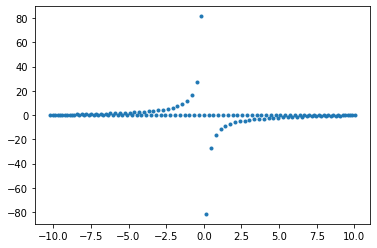

In [8]:
plt.plot(freq, Ak.imag, '.');

식 (4)을 식 (3)로 맞추어 비교하기 위하여 n으로 나누어 보자.

In [9]:
Ak.imag[:64] / n

array([ 0.0000e+00, -6.3649e-01,  0.0000e+00, -2.1182e-01,  0.0000e+00,
       -1.2668e-01,  0.0000e+00, -9.0049e-02,  0.0000e+00, -6.9581e-02,
        0.0000e+00, -5.6461e-02,  0.0000e+00, -4.7298e-02,  0.0000e+00,
       -4.0506e-02,  0.0000e+00, -3.5249e-02,  0.0000e+00, -3.1042e-02,
        0.0000e+00, -2.7582e-02,  0.0000e+00, -2.4675e-02,  0.0000e+00,
       -2.2186e-02,  0.0000e+00, -2.0022e-02,  0.0000e+00, -1.8114e-02,
        0.0000e+00, -1.6411e-02,  0.0000e+00, -1.4876e-02,  0.0000e+00,
       -1.3478e-02,  0.0000e+00, -1.2194e-02,  0.0000e+00, -1.1004e-02,
        0.0000e+00, -9.8944e-03,  0.0000e+00, -8.8515e-03,  0.0000e+00,
       -7.8650e-03,  0.0000e+00, -6.9261e-03,  0.0000e+00, -6.0272e-03,
        0.0000e+00, -5.1618e-03,  0.0000e+00, -4.3240e-03,  0.0000e+00,
       -3.5087e-03,  0.0000e+00, -2.7112e-03,  0.0000e+00, -1.9272e-03,
        0.0000e+00, -1.1526e-03,  0.0000e+00, -3.8357e-04])

이 결과는 식 (2)의 복소 푸리에 계수의 계산치와 일치한다.

In [10]:
list([-2 / (k * np.pi) for k in range(10) if k % 2 != 0])

[-0.6366197723675814,
 -0.2122065907891938,
 -0.12732395447351627,
 -0.09094568176679733,
 -0.0707355302630646]

이산 푸리에 변환에서는 음의 주파수 개념이 존재한다. 이것은 $\theta \gt \pi$일 때 $e^{i \theta}$를 $e^{i(2\pi - \theta)}$로 생각하여 연속 함수에서 일정 간격으로 표본을 추출할 때 빠른 주파수의 신호보다는 느린 시계 방향의 신호로 보자는 것이다. DFT의 결과로부터 연속 함수를 재현해 본다면, 

$x(t) = A_1 e^{i t} + A_{-1} e^{-i t} + \cdots = \frac{-2i}{\pi} [\cos(t) + i \sin(t)]  + \frac{2i}{\pi} [\cos(t) - i \sin(t)] \cdots$

최종적으로,

$x(t) = \frac{4}{\pi} \sin(t) + \frac{4}{3\pi} \sin(3t) \cdots$

식으로 정리되어 애초의 sympy에서 얻은 푸리에 급수 식을 얻을 수 있다. 음과 양의 주파수의 합의 의미에서 식 (1)에 합 $\Sigma$ 앞에 2를 붙었다고 볼 수 있다.

실수 표본 순차열의 이산 푸리에 변환 결과는 대칭이고 주기성을 갖는다. 이 관점에서 음의 주파수 뿐만아니라 에일리어싱(aliasing)도 발생하게 된다.